In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import statistics
import pymysql
from sqlalchemy import create_engine
import getpass  
warnings.filterwarnings('ignore')
from collections import Counter
from seaborn import load_dataset
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn import neighbors 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

In [2]:
Other_Lodge = pd.read_excel('Other_Lodge_BCN.xlsx')

In [3]:
Other_Lodge.head(60)

,register_id,name,institution_id,institution_name,created,modified,addresses_roadtype_id,addresses_roadtype_name,addresses_road_id,addresses_road_name,...,values_description,secondary_filters_id,secondary_filters_name,secondary_filters_fullpath,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y
0,﻿99400011042,Alberg Center Rambles - AJ000398,NaN,NaN,2002-07-06T10:38:49+02:00,2022-09-17T05:57:01.121598+02:00,NaN,NaN,157909,C Hospital,...,NaN,54733069,Albergs juvenils,Planol BCN >> Allotjament >> Altres allotjamen...,651,65103001002001,43065858012113200,4581331372248220,413805185765298,21707195328025000
1,﻿92086033816,Alberg Fernando - AJ000419,NaN,NaN,1991-01-08T00:00:00+01:00,2022-09-17T04:44:40.530584+02:00,NaN,NaN,122904,C Ferran,...,NaN,54733069,Albergs juvenils,Planol BCN >> Allotjament >> Altres allotjamen...,651,65103001002001,43105724322458896,4581431165355760,4138145164237970,2175475468533940
2,﻿75990043118,Residència Estudiants Religiosa Maria Immaculada,NaN,NaN,1996-09-18T00:00:00+02:00,2022-02-08T12:49:57.160548+01:00,NaN,NaN,89004,Consell de Cent,...,NaN,54733071,Residències d'estudiants,Planol BCN >> Allotjament >> Altres allotjamen...,651,65103001002003,43063824699417904,4582906186877120,41394700682603296,2170296073372870
3,﻿99400164110,Residència Universitària Internacional Àgora BCN,NaN,NaN,2006-07-03T15:14:02+02:00,2022-09-17T06:37:04.147972+02:00,NaN,NaN,72158,Pg Castanyers,...,NaN,54733070,Col.legis majors,Planol BCN >> Allotjament >> Altres allotjamen...,651,65103001002002,4289488693610330,4587883634005900,4143938303106750,2149505229325450
4,﻿99400164110,Residència Universitària Internacional Àgora BCN,NaN,NaN,2006-07-03T15:14:02+02:00,2022-09-17T06:37:04.147972+02:00,NaN,NaN,72158,Pg Castanyers,...,NaN,54733071,Residències d'estudiants,Planol BCN >> Allotjament >> Altres allotjamen...,651,65103001002003,4289488693610330,4587883634005900,4143938303106750,2149505229325450
5,﻿99400082594,Residencia Juvenes,NaN,NaN,2004-04-26T23:30:00+02:00,2022-09-17T06:16:52.553866+02:00,NaN,NaN,32700,C Balmes,...,NaN,54733071,Residències d'estudiants,Planol BCN >> Allotjament >> Altres allotjamen...,651,65103001002003,4301378330135440,4582153237120400,41387875800281296,21643975887384300
6,﻿94118152443,Casa de la Jove,9.208603e+10,Associació In via,1994-04-28T00:00:00+02:00,2022-09-17T05:08:47.892640+02:00,NaN,NaN,14209,C Amistat,...,NaN,54733071,Residències d'estudiants,Planol BCN >> Allotjament >> Altres allotjamen...,651,65103001002003,4335927811683360,4583480786865120,4140012536076030,2205571801602070
7,﻿95061193529,Col.legi Major Mater Salvatoris,NaN,NaN,1995-03-02T00:00:00+01:00,2022-09-17T05:13:15.762815+02:00,NaN,NaN,108801,Emancipació,...,NaN,54733070,Col.legis majors,Planol BCN >> Allotjament >> Altres allotjamen...,651,65103001002002,42747930347941400,4583895913560610,4140333607410300,21323943694890700
8,﻿99400010026,Residència Universitària Torre Girona,NaN,NaN,2002-06-25T20:14:54+02:00,2022-09-17T05:56:43.997604+02:00,NaN,NaN,336001,Pg Til.lers,...,NaN,54733071,Residències d'estudiants,Planol BCN >> Allotjament >> Altres allotjamen...,651,65103001002003,4258844823345900,4582254045231110,41388403084535000,2113517757319550
9,﻿75990543263,Residència Universitària Apimec,NaN,NaN,1998-10-24T00:00:00+02:00,2022-09-17T03:37:18.603319+02:00,NaN,NaN,49509,C Bruc,...,NaN,54733071,Residències d'estudiants,Planol BCN >> Allotjament >> Altres allotjamen...,651,65103001002003,4302876643450010,4583177236160900,4139711161787590,21660716314146700


In [4]:
Other_Lodge=Other_Lodge.replace({"name": {"À": "A", "Á": "A", "Ä": "A", "à": "a", "á": "a","ä": "a", "È": "E", "É": "E", "Ë": "E", "è": "e", "é": "e", "ë": "e", "Ì": "I", "Í": "I", "Ï": "I", "ì": "i", "í": "i", "ï": "i", "Ò": "O", "Ó": "O", "Ö": "O", "ò": "o", "ó": "o", "ö": "o", "Ù": "U", "Ú": "U", "Ü": "U", "ù": "u", "ú": "u", "ü": "u", "ç": "c", "ñ": "n", "Ç": "C", "Ñ": "N","l·l": "ll","l.l": "ll"}}, regex=True)
#Other_Lodge=Other_Lodge.replace({"name": {"À": "A", "Á": "A", "Ä": "A", "à": "a", "á": "a","ä": "a", "È": "E", "É": "E", "Ë": "E", "è": "e", "é": "e", "ë": "e", "Ì": "I", "Í": "I", "Ï": "I", "ì": "i", "í": "i", "ï": "i", "Ò": "O", "Ó": "O", "Ö": "O", "ò": "o", "ó": "o", "ö": "o", "Ù": "U", "Ú": "U", "Ü": "U", "ù": "u", "ú": "u", "ü": "u", "ç": "c", "ñ": "n", "Ç": "C", "Ñ": "N", "·": "", "@": "", "$": "", "&": "i", "!": "", "%": "", "/: "", "+": ""}}, regex=True)

In [5]:
Other_Lodge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   register_id                    210 non-null    object 
 1   name                           210 non-null    object 
 2   institution_id                 2 non-null      float64
 3   institution_name               2 non-null      object 
 4   created                        210 non-null    object 
 5   modified                       210 non-null    object 
 6   addresses_roadtype_id          0 non-null      float64
 7   addresses_roadtype_name        0 non-null      float64
 8   addresses_road_id              210 non-null    int64  
 9   addresses_road_name            210 non-null    object 
 10  addresses_start_street_number  210 non-null    int64  
 11  addresses_end_street_number    7 non-null      float64
 12  addresses_neighborhood_id      210 non-null    int

In [6]:
Other_Lodge.drop(['register_id','institution_id','institution_name','addresses_roadtype_id','addresses_roadtype_name','addresses_type','values_description'], inplace=True, axis=1)

In [7]:
Other_Lodge.drop(['addresses_end_street_number'], inplace=True, axis=1)

In [8]:
Other_Lodge['created'] = pd.to_datetime(Other_Lodge['created'], format = "%Y-%m-%dT%H:%M:%S%z", errors='ignore',utc=True)

In [9]:
Other_Lodge['month_created'] = Other_Lodge['created'].dt.month
Other_Lodge['year_created'] = Other_Lodge['created'].dt.year

In [10]:
Other_Lodge.drop(['modified'], inplace=True, axis=1)

In [11]:
Other_Lodge=Other_Lodge.rename(columns={'secondary_filters_name' : 'hotel_Rating'})

In [12]:
Other_Lodge.drop(['secondary_filters_fullpath'], inplace=True, axis=1)

In [13]:
Other_Lodge.drop(['secondary_filters_id'], inplace=True, axis=1)

In [14]:
Other_Lodge.drop(['values_outstanding'], inplace=True, axis=1)

In [15]:
Other_Lodge.drop(['secondary_filters_tree'], inplace=True, axis=1)

In [16]:
Other_Lodge.drop(['secondary_filters_asia_id'], inplace=True, axis=1)

In [17]:
Other_Lodge.drop(['values_category'], inplace=True, axis=1)

In [18]:
Other_Lodge=Other_Lodge.rename(columns={'values_attribute_name' : 'type_of_contact'})

In [19]:
Other_Lodge=Other_Lodge.rename(columns={'values_value' : 'phone_number'})

In [20]:
Other_Lodge.drop(['values_attribute_id'], inplace=True, axis=1)

In [21]:
Other_Lodge.drop(['values_id'], inplace=True, axis=1)

In [22]:
Other_Lodge.drop(['addresses_main_address'], inplace=True, axis=1)

In [23]:
Other_Lodge.drop(['addresses_road_id'], inplace=True, axis=1)

In [24]:
Other_Lodge['addresses_start_street_number'] = Other_Lodge['addresses_start_street_number'].astype(int)

In [25]:
Other_Lodge['name']=Other_Lodge.name.str.split('-', expand=True, regex=None)[0]

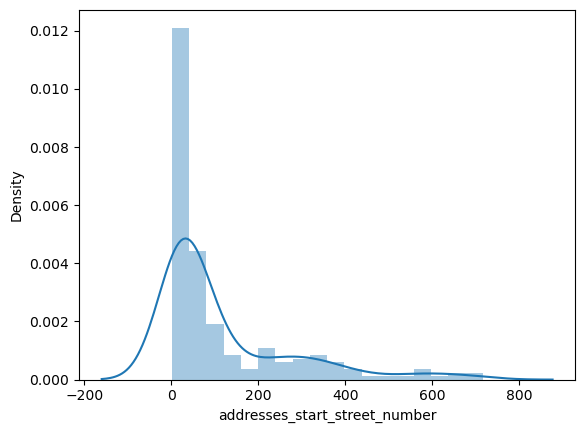

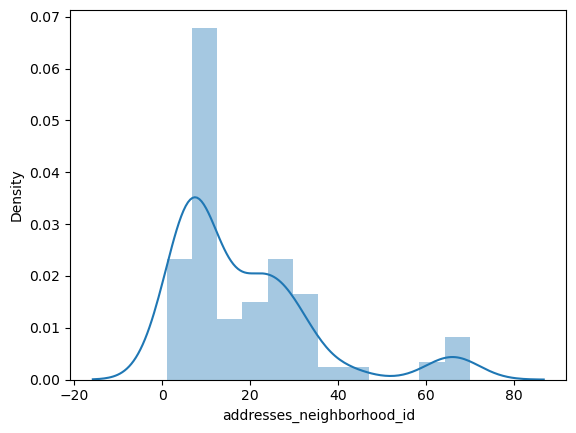

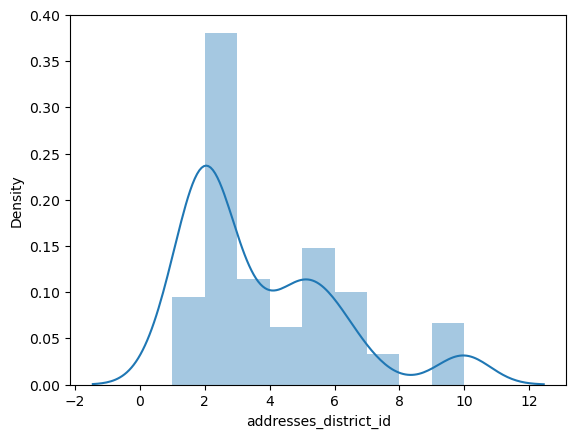

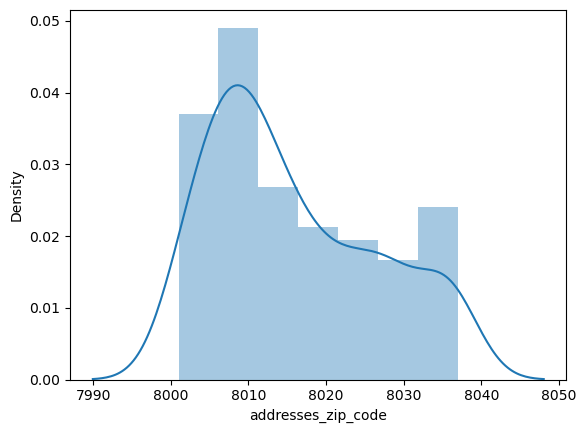

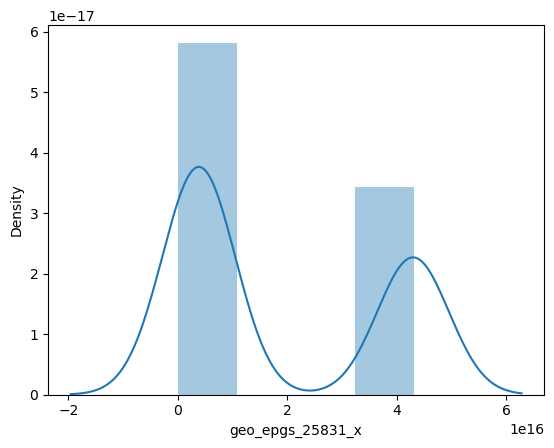

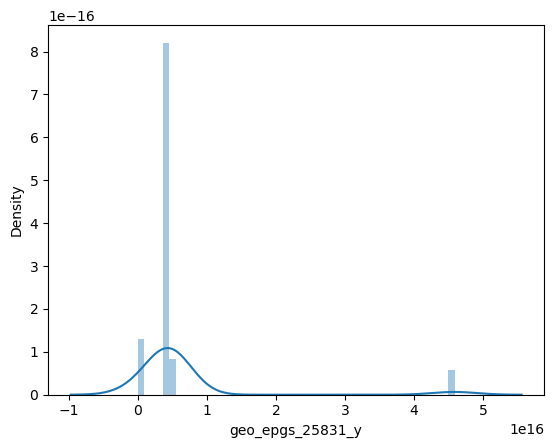

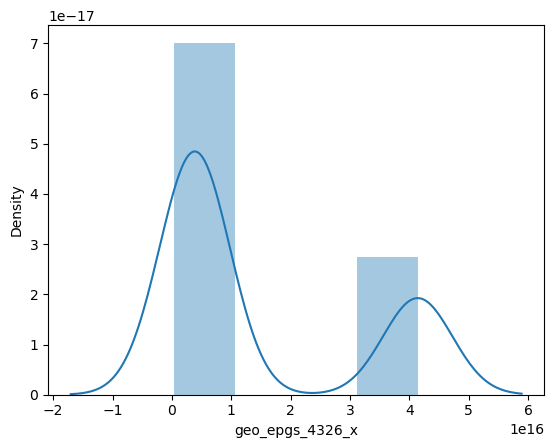

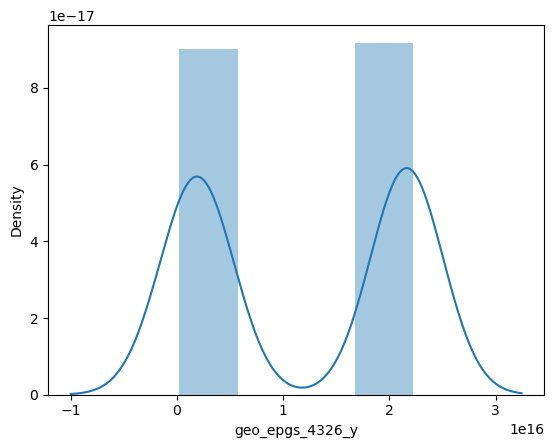

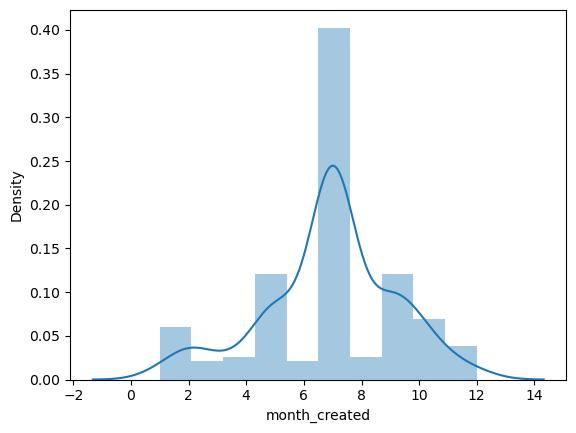

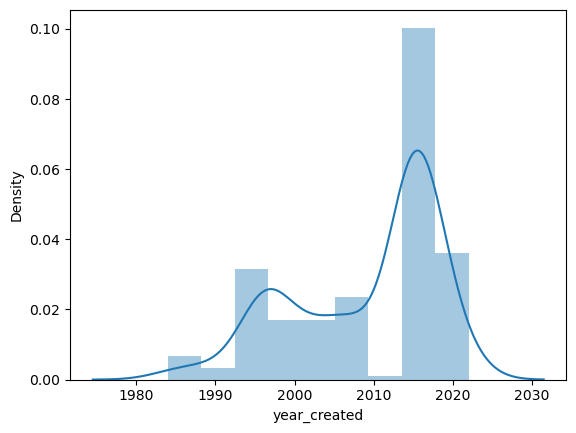

In [26]:
Other_Lodge_numerical = Other_Lodge.select_dtypes(np.number)

for column in Other_Lodge_numerical.columns:
    sns.distplot(Other_Lodge_numerical[column])
    plt.show()

In [27]:
Other_Lodge_numerical.head()

,addresses_start_street_number,addresses_neighborhood_id,addresses_district_id,addresses_zip_code,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,month_created,year_created
0,63,1,1,8001,43065858012113200,4581331372248220,413805185765298,21707195328025000,7,2002
1,31,2,1,8002,43105724322458896,4581431165355760,4138145164237970,2175475468533940,1,1991
2,393,7,2,8009,43063824699417904,4582906186877120,41394700682603296,2170296073372870,9,1996
3,21,43,7,8035,4289488693610330,4587883634005900,4143938303106750,2149505229325450,7,2006
4,21,43,7,8035,4289488693610330,4587883634005900,4143938303106750,2149505229325450,7,2006


In [28]:
Other_Lodge_categorical = Other_Lodge.select_dtypes(object)
Other_Lodge_categorical.head()

,name,addresses_road_name,addresses_neighborhood_name,addresses_district_name,addresses_town,type_of_contact,phone_number,hotel_Rating
0,Alberg Center Rambles,C Hospital,el Raval,Ciutat Vella,BARCELONA,Tel.,934124069,Albergs juvenils
1,Alberg Fernando,C Ferran,el Barri Gòtic,Ciutat Vella,BARCELONA,Tel.,933017973,Albergs juvenils
2,Residencia Estudiants Religiosa Maria Immaculada,Consell de Cent,la Dreta de l'Eixample,Eixample,BARCELONA,Tel.,934878930,Residències d'estudiants
3,Residencia Universitaria Internacional Agora BCN,Pg Castanyers,Horta,Horta-Guinardó,BARCELONA,Tel.,935040420,Col.legis majors
4,Residencia Universitaria Internacional Agora BCN,Pg Castanyers,Horta,Horta-Guinardó,BARCELONA,Tel.,935040420,Residències d'estudiants


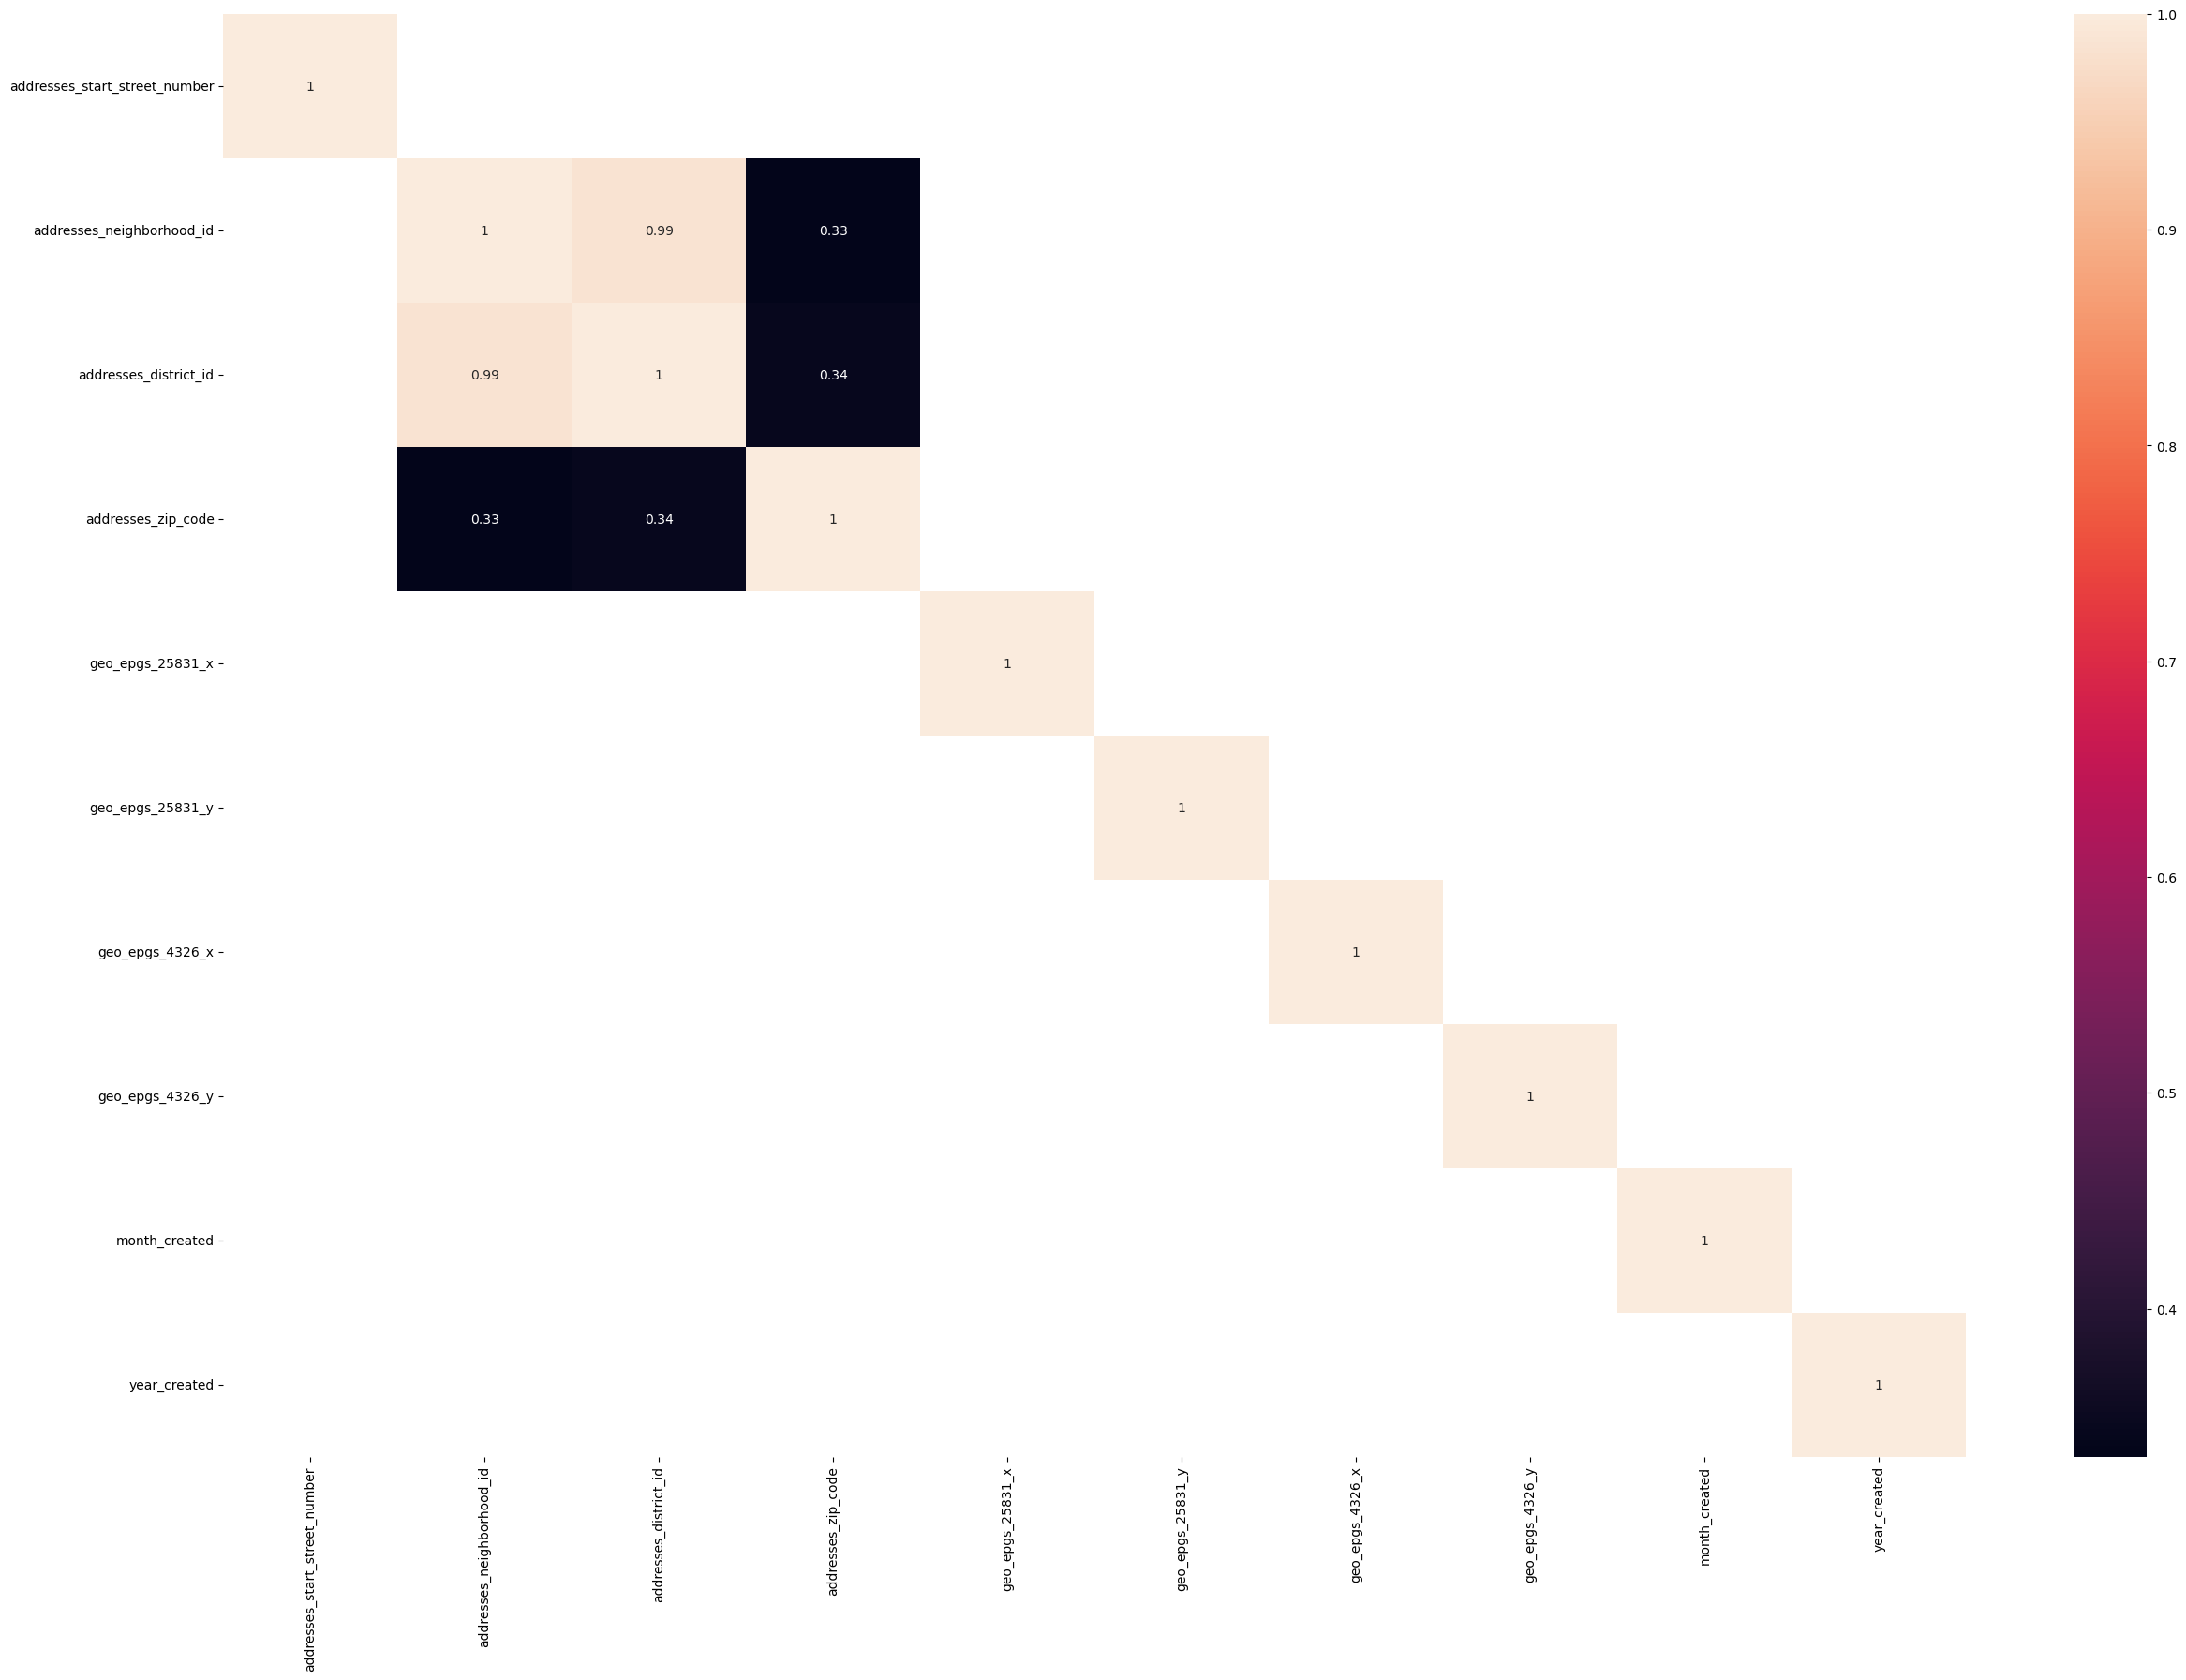

In [29]:
corova = Other_Lodge.corr()

plt.figure(figsize=(30,20))
sns.heatmap(corova, annot=True, mask=(np.abs(corova) <= 0.2))
plt.show()

In [30]:
Other_Lodge.hotel_Rating.value_counts(dropna=False)

Albergs juvenils            121
Residències d'estudiants     66
Apartaments                  12
Col.legis majors             11
Name: hotel_Rating, dtype: int64

In [31]:
def rating(x):
    if x in ['Albergs juvenils']:
        return 0
    if x in ["Residències d'estudiants"]:
        return 0
    if x in ['Apartaments']:
        return 0
    if x in ['Col.legis majors']:
        return 0
    else:
        return x

In [32]:
Other_Lodge['hotel_Rating'] = list(map(rating, Other_Lodge['hotel_Rating']))

In [33]:
Other_Lodge.hotel_Rating.value_counts(dropna=False)

0    210
Name: hotel_Rating, dtype: int64

In [34]:
Other_Lodge.head(50)

,name,created,addresses_road_name,addresses_start_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,addresses_district_name,addresses_zip_code,addresses_town,type_of_contact,phone_number,hotel_Rating,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,month_created,year_created
0,Alberg Center Rambles,2002-07-06 08:38:49+00:00,C Hospital,63,1,el Raval,1,Ciutat Vella,8001,BARCELONA,Tel.,934124069,0,43065858012113200,4581331372248220,413805185765298,21707195328025000,7,2002
1,Alberg Fernando,1991-01-07 23:00:00+00:00,C Ferran,31,2,el Barri Gòtic,1,Ciutat Vella,8002,BARCELONA,Tel.,933017973,0,43105724322458896,4581431165355760,4138145164237970,2175475468533940,1,1991
2,Residencia Estudiants Religiosa Maria Immaculada,1996-09-17 22:00:00+00:00,Consell de Cent,393,7,la Dreta de l'Eixample,2,Eixample,8009,BARCELONA,Tel.,934878930,0,43063824699417904,4582906186877120,41394700682603296,2170296073372870,9,1996
3,Residencia Universitaria Internacional Agora BCN,2006-07-03 13:14:02+00:00,Pg Castanyers,21,43,Horta,7,Horta-Guinardó,8035,BARCELONA,Tel.,935040420,0,4289488693610330,4587883634005900,4143938303106750,2149505229325450,7,2006
4,Residencia Universitaria Internacional Agora BCN,2006-07-03 13:14:02+00:00,Pg Castanyers,21,43,Horta,7,Horta-Guinardó,8035,BARCELONA,Tel.,935040420,0,4289488693610330,4587883634005900,4143938303106750,2149505229325450,7,2006
5,Residencia Juvenes,2004-04-26 21:30:00+00:00,C Balmes,23,8,l'Antiga Esquerra de l'Eixample,2,Eixample,8007,BARCELONA,Tel.,934537947,0,4301378330135440,4582153237120400,41387875800281296,21643975887384300,4,2004
6,Casa de la Jove,1994-04-27 22:00:00+00:00,C Amistat,15,68,el Poblenou,10,Sant Martí,8005,BARCELONA,Tel.,932155626,0,4335927811683360,4583480786865120,4140012536076030,2205571801602070,4,1994
7,Collegi Major Mater Salvatoris,1995-03-01 23:00:00+00:00,Emancipació,33,25,Sant Gervasi - la Bonanova,5,Sarrià-Sant Gervasi,8022,BARCELONA,Tel.,932126900,0,42747930347941400,4583895913560610,4140333607410300,21323943694890700,3,1995
8,Residencia Universitaria Torre Girona,2002-06-25 18:14:54+00:00,Pg Til.lers,19,21,Pedralbes,4,Les Corts,8034,BARCELONA,Tel.,933904300,0,4258844823345900,4582254045231110,41388403084535000,2113517757319550,6,2002
9,Residencia Universitaria Apimec,1998-10-23 22:00:00+00:00,C Bruc,136,7,la Dreta de l'Eixample,2,Eixample,8037,BARCELONA,Tel.,934579351,0,4302876643450010,4583177236160900,4139711161787590,21660716314146700,10,1998


In [35]:
Other_Lodge.to_csv('Other_Lodge_cleaned.csv', index=False,sep=',',encoding='utf-8')